<a href="https://colab.research.google.com/github/veronikacoding/data-and-python/blob/main/Projects/Female_employment_data_lists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Female employment rates

## 1971 to 2023 UK

Link to data source: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/timeseries/lf25/lms

The data has been retrieved and used to create a list of dictionary records.  Each record contains a time_period and the female employment rate (seasonally adjusted %) for the UK.

Some questions to ask of the data might be how much the percentage of the female population in the workplace has changed since 1971, is the rate of change different in different parts of the year?

Run the code cell below to generate, and print, a list of dictionaries, so that you can see the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data():
  url = "https://drive.google.com/uc?id=1aQ8Xy-Sw046j-JCiIOu3ETqrACFsYuCj"
  df = pd.read_csv(url, skiprows=8, header=None)
  time_periods = df[0].tolist()
  employment = df[1].tolist()
  datalist = []
  for i in range(len(df)):
    datalist.append({"Time_period":time_periods[i], "Employment":employment[i]})
  return datalist

employment_data = get_data()
for item in employment_data:
  print(item)



There is a collection of different types of time_periods (whole years, years in quarters, months).

Observe the lists and then write code to create a set of smaller lists that make some sense.  Here are some ideas:

* a list of all the employment figures for whole years
* a list of all the employment figures for Q1 for all given years (and another for Q2, etc)
* a list of all the employment figures for January for all given years (and another for February, etc)  


In [ ]:
year_dictionary = {}
quarter_dictionary = {}
monthly_dictionary = {}

for i in employment_data:
  time_period = i["Time_period"]

  if "Q" in time_period:
    quarter_dictionary[time_period] = i["Employment"]
  elif " " not in time_period:
    year_dictionary[time_period] = i["Employment"]
  else:
    monthly_dictionary[time_period] = i["Employment"]

print(year_dictionary)

In [ ]:
print("The data broken down to years with their corresponding female employment rate is: ")
for year, rate in year_dictionary.items():
  print(f"Year: {year}, Employment rate: {rate}%")

In [ ]:
print("The data broken down to quarters and years with their corresponding female employment rate is: ")
for year, rate in quarter_dictionary.items():
  print(f"Year: {year}, Employment rate: {rate}%")

In [ ]:
print("The data broken down to months and years with their corresponding female employment rate is: ")
for year, rate in monthly_dictionary.items():
  print(f"Year: {year}, Employment rate: {rate}%")

Average female employment rate between 1971 and 2023

In [21]:
total_rates = sum(year_dictionary.values())
avg_rate = round(total_rates / len(year_dictionary), 2)

highest_rate = max(year_dictionary.values())
index_with_highest_rate = list(year_dictionary.values()).index(highest_rate)
highest_rate_year = list(year_dictionary.keys())[index_with_highest_rate]

lowest_rate = min(year_dictionary.values())
index_with_lowest_rate = list(year_dictionary.values()).index(lowest_rate)
lowest_rate_year = list(year_dictionary.keys())[index_with_lowest_rate]

percentage_increase_between_lowest_and_highest = round(((highest_rate - lowest_rate) / lowest_rate) * 100)

print("The average female employment rate in the last 52 years is: ",avg_rate,"%")

print("The year with the lowest female employment rate was recorded in", lowest_rate_year,"with a", lowest_rate,"% rate, whereas the year with the highest female employment rate was in",highest_rate_year,"with a", highest_rate,"% rate")

print("The percentage increase in employment rate is", percentage_increase_between_lowest_and_highest,"% between",lowest_rate_year,"and",highest_rate_year)

The average female employment rate in the last 52 years is:  62.78 %
The year with the lowest female employment rate was recorded in 1971 with a 52.7 % rate, whereas the year with the highest female employment rate was in 2022 with a 72.2 % rate
The percentage increase in employment rate is 37 % between 1971 and 2022


Calculate some statistics from your lists (e.g. mean, max, min, etc for all years, for the same quarter, or month, over all years, etc) and think about correlation between quarter and employment rate - can you show this?

Quarterly statistics

In [55]:
highest_rate_q = max(quarter_dictionary.values())
index_with_highest_rate_q = list(quarter_dictionary.values()).index(highest_rate_q)
highest_rate_year_q = list(quarter_dictionary.keys())[index_with_highest_rate_q]

print(highest_rate_q, highest_rate_year_q)

target_period = '2020 Q3'
employment_rate_twentytwenty_q3 = quarter_dictionary.get(target_period)

print(employment_rate_twentytwenty_q3, target_period)

print("The difference between Q1 and Q3 in 2020 are :",highest_rate_q,"in",highest_rate_year_q,"and",employment_rate_twentytwenty_q3,"in", target_period)
print("This shows that the female employment rate was higher in the months Jan/Feb/Mar than in the months Jul/Aug/Sep.")
print("The average female employment rate is slowly going up so maybe the reason why Q1 is higher than Q3 is because of COVID. This is just an assumption, though")

72.5 2020 Q1
71.7 2020 Q3
The difference between Q1 and Q3 in 2020 are : 72.5 in 2020 Q1 and 71.7 in 2020 Q3
This shows that the female employment rate was higher in the months Jan/Feb/Mar than in the months Jul/Aug/Sep.
The average female employment rate is slowly going up so maybe the reason why Q1 is higher than Q3 is because of COVID. This is just an assumption, though


In [ ]:
,,

Visualisation of female employment rate between 1971 and 2023

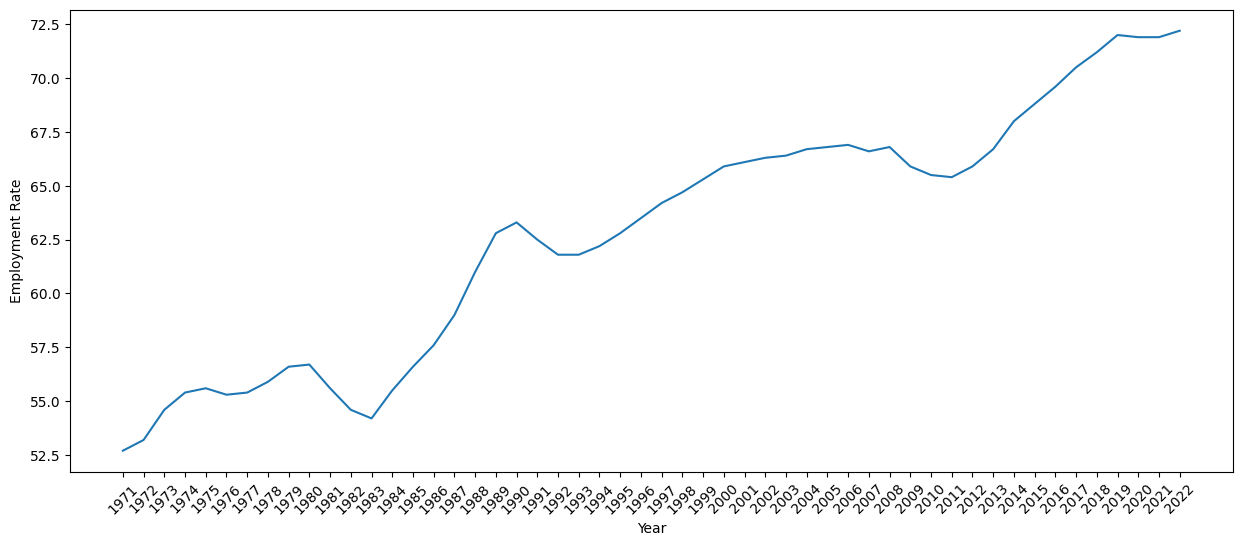

In [ ]:
years = list(year_dictionary.keys())
employment_rates = list(year_dictionary.values())

plt.figure(figsize=(15, 6))
plt.plot(years, employment_rates)
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)

plt.show()

In [39]:
#some more statistics

quarter_employment_rates = list(quarter_dictionary.values())
print(quarter_employment_rates)

mean_rate = np.mean(quarter_employment_rates)
print(mean_rate)

max_rate = np.max(quarter_employment_rates)
print(max_rate)

min_rate = np.min(quarter_employment_rates)
print(min_rate)

[52.8, 52.7, 52.7, 52.6, 52.9, 53.1, 53.3, 53.6, 54.2, 54.5, 54.7, 54.9, 55.1, 55.3, 55.6, 55.7, 55.6, 55.6, 55.6, 55.5, 55.4, 55.3, 55.3, 55.3, 55.4, 55.4, 55.4, 55.5, 55.6, 55.8, 55.9, 56.2, 56.3, 56.5, 56.7, 56.9, 56.9, 56.8, 56.6, 56.3, 56.0, 55.7, 55.5, 55.3, 55.0, 54.8, 54.5, 54.1, 53.8, 53.8, 54.3, 54.8, 55.1, 55.4, 55.6, 56.0, 56.2, 56.5, 56.8, 57.0, 57.2, 57.5, 57.7, 58.1, 58.3, 58.7, 59.3, 59.9, 60.3, 60.7, 61.3, 61.8, 62.4, 62.7, 62.8, 63.1, 63.2, 63.4, 63.4, 63.3, 62.9, 62.6, 62.3, 62.1, 62.0, 61.8, 61.8, 61.8, 61.6, 61.8, 62.0, 61.9, 62.1, 62.2, 62.3, 62.2, 62.5, 62.7, 62.9, 63.3, 63.4, 63.4, 63.5, 63.8, 64.0, 64.3, 64.3, 64.3, 64.4, 64.4, 64.8, 65.1, 65.2, 65.2, 65.4, 65.6, 65.6, 65.9, 66.1, 65.9, 65.9, 66.3, 65.9, 66.2, 66.1, 66.5, 66.4, 66.4, 66.4, 66.4, 66.4, 66.6, 66.8, 66.6, 66.6, 66.8, 66.9, 66.8, 67.1, 66.6, 67.1, 67.0, 66.7, 66.7, 66.4, 66.5, 66.6, 66.8, 67.0, 67.0, 66.7, 66.5, 66.2, 65.7, 65.8, 65.9, 65.6, 65.5, 65.6, 65.2, 65.5, 65.4, 65.3, 65.4, 65.4, 65.8, 66.